# 6.3 Geographic Visualizations

This script contains the following:¶
1. Import data and libraries
2. Data wrangling
3. Data cleaning
4. Plotting a choropleth

# 1. Import data and libraries

In [93]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json

In [94]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline

In [95]:
# Import ".json" file for the Country/Region 

country_geo = r'/Users/brad/Desktop/world-countries.json'

In [96]:
# That's just in case you want to look at the JSON file contents here too:

f = open(country_geo,)
  
# returns JSON object asa dictionary
country_geo_json = json.load(f)
  
# Iterating through the json list
for i in data['features']:
    print(i)

{'type': 'Feature', 'properties': {'featurecla': 'Admin-0 country', 'scalerank': 1, 'labelrank': 5, 'sovereignt': 'Costa Rica', 'sov_a3': 'CRI', 'adm0_dif': 0, 'level': 2, 'type': 'Sovereign country', 'tlc': '1', 'admin': 'Costa Rica', 'adm0_a3': 'CRI', 'geou_dif': 0, 'geounit': 'Costa Rica', 'gu_a3': 'CRI', 'su_dif': 0, 'subunit': 'Costa Rica', 'su_a3': 'CRI', 'brk_diff': 0, 'name': 'Costa Rica', 'name_long': 'Costa Rica', 'brk_a3': 'CRI', 'brk_name': 'Costa Rica', 'brk_group': None, 'abbrev': 'C.R.', 'postal': 'CR', 'formal_en': 'Republic of Costa Rica', 'formal_fr': None, 'name_ciawf': 'Costa Rica', 'note_adm0': None, 'note_brk': None, 'name_sort': 'Costa Rica', 'name_alt': None, 'mapcolor7': 3, 'mapcolor8': 2, 'mapcolor9': 4, 'mapcolor13': 2, 'pop_est': 5047561, 'pop_rank': 13, 'pop_year': 2019, 'gdp_md': 61801, 'gdp_year': 2019, 'economy': '5. Emerging region: G20', 'income_grp': '3. Upper middle income', 'fips_10': 'CS', 'iso_a2': 'CR', 'iso_a2_eh': 'CR', 'iso_a3': 'CRI', 'iso_a3

In [97]:
path = '/Users/brad/Desktop/ACHIEVEMENT 6'

In [98]:
# Import the recipes data

df = pd.read_csv(os.path.join(path, '/Users/brad/Desktop/ACHIEVEMENT 6/Original Data/archive (3)/2019.csv'))

In [99]:
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [100]:
df.shape

(156, 9)

# 2. Data Wrangling & Data Cleaning

In [101]:
df.shape

(156, 9)

In [102]:
df.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [103]:
# Rename columns whose names are too long

df.rename(columns = {'Overall rank' : 'Rank', 'Healthy life expectancy': 'Life expectancy', 
                     'Freedom to make life choices': 'freedom of choice'},
                      inplace = True)

In [104]:
df.columns

Index(['Rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Life expectancy', 'freedom of choice', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [105]:
df.dtypes

Rank                           int64
Country or region             object
Score                        float64
GDP per capita               float64
Social support               float64
Life expectancy              float64
freedom of choice            float64
Generosity                   float64
Perceptions of corruption    float64
dtype: object

In [106]:
df.head()

,Rank,Country or region,Score,GDP per capita,Social support,Life expectancy,freedom of choice,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [107]:
# Checking for missing values


df.isnull().sum() # No missing values!

Rank                         0
Country or region            0
Score                        0
GDP per capita               0
Social support               0
Life expectancy              0
freedom of choice            0
Generosity                   0
Perceptions of corruption    0
dtype: int64

In [108]:
# Find duplicates

df_dups = df[df.duplicated()]

In [109]:
df_dups.shape # No duplicates!

(0, 9)

What questions/variables do I want to look at for this analysis? 

- The Happiness Rank of countries
- GDP per country 
- Life expectancy per country 
- Social support per country

In [110]:
#Create a list of necessary columns
columns = ['Country or region','Score', 'GDP per capita', 'Social support', 'Life expectancy']

In [111]:
#Create a subset
Happiness_geo = df[columns]

In [112]:
Happiness_geo.shape

(156, 5)

In [113]:
Happiness_geo.head()

,Country or region,Score,GDP per capita,Social support,Life expectancy
0,Finland,7.769,1.340,1.587,0.986
1,Denmark,7.600,1.383,1.573,0.996
2,Norway,7.554,1.488,1.582,1.028
3,Iceland,7.494,1.380,1.624,1.026
4,Netherlands,7.488,1.396,1.522,0.999


# Extreme Value Checks

/Users/brad/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/brad/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Score', ylabel='Count'>

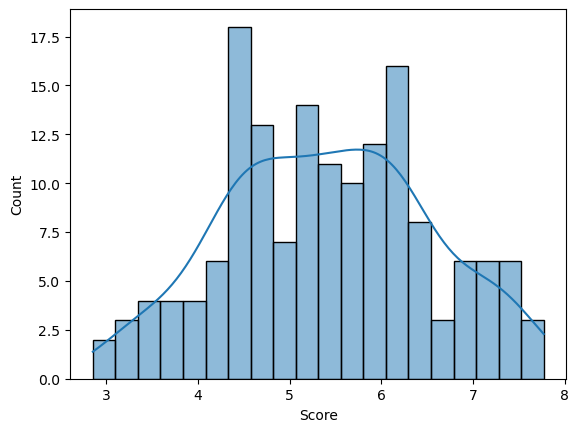

In [114]:
sns.histplot(Happiness_geo['Score'], bins=20, kde = True) # shows extreme values for 'Score'

No extreme values

/Users/brad/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/brad/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='GDP per capita', ylabel='Count'>

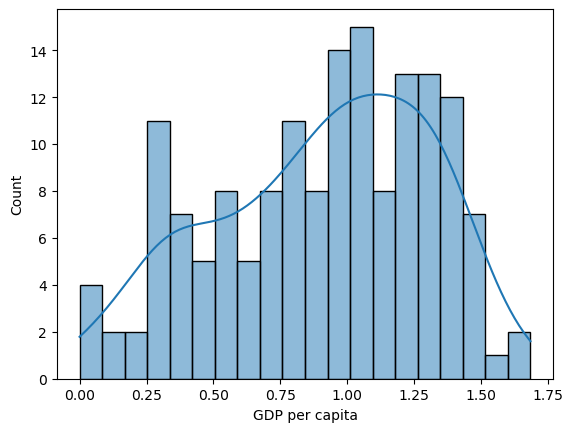

In [115]:
sns.histplot(Happiness_geo['GDP per capita'], bins=20, kde = True) # shows extreme values for 'GDP per capita'

No extreme values

/Users/brad/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/brad/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Life expectancy', ylabel='Count'>

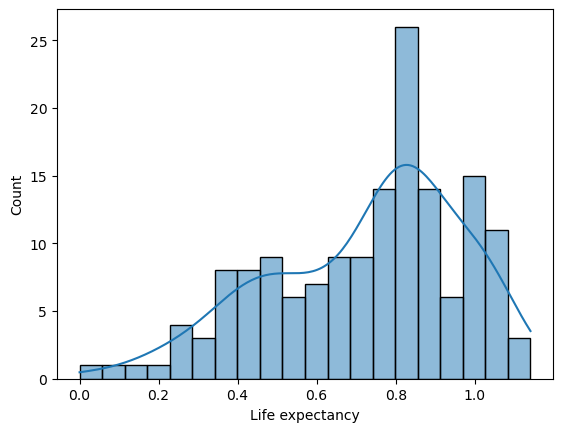

In [116]:
sns.histplot(Happiness_geo['Life expectancy'], bins=20, kde = True) # shows extreme values for 'Life expectancy'

No extreme values

/Users/brad/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/brad/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Social support', ylabel='Count'>

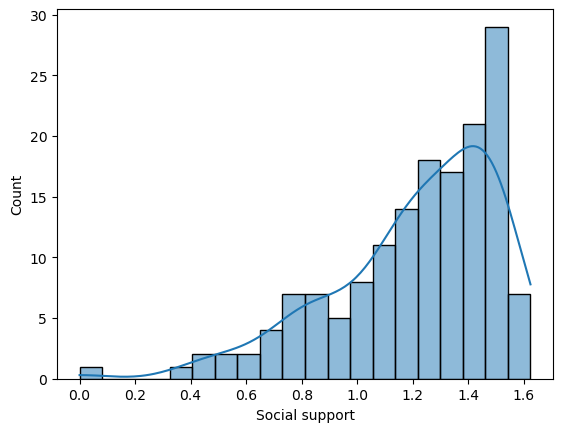

In [117]:
sns.histplot(Happiness_geo['Social support'], bins=20, kde = True) # shows extreme values for 'Social support'

No extreme values

# 3. Creating Chloropleth Maps

## Chloropleth Map for Happiness Score per Country

In [125]:
map = folium.Map(location = [40, -95], zoom_start = 4)

folium.Choropleth(
    geo_data = country_geo_json, 
    data = Happiness_geo,
    columns = ['Country or region', 'Score'],
    key_on = 'feature.properties.name',
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "Happiness Score").add_to(map)

folium.LayerControl().add_to(map)

map

In [126]:
map.save('plot_Happiness_Score.html')

*Chloropleth Map by Happiness Score*
I chose this map to provide a baseline for a geographic overview of how each country ranked in terms of their overall happiness score.

# Chloropleth Map for GDP per Capita per Country

In [127]:
map = folium.Map(location = [40, -95], zoom_start = 4)

folium.Choropleth(
    geo_data = country_geo_json, 
    data = Happiness_geo,
    columns = ['Country or region', 'GDP per capita'],
    key_on = 'feature.properties.name',
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "GDP per capita").add_to(map)

folium.LayerControl().add_to(map)

map

In [128]:
map.save('plot_GDP_per_capita.html')

*Chloropleth Map by GDP per capita Score*
This map indicates that there is the GDP per capita per country broadly mirrors that of their Happiness scores, indicating strong correlation

# Chloropleth Map for Life Expectancy per Country

In [129]:
map = folium.Map(location = [40, -95], zoom_start = 4)

folium.Choropleth(
    geo_data = country_geo_json, 
    data = Happiness_geo,
    columns = ['Country or region', 'Life expectancy'],
    key_on = 'feature.properties.name',
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "Life Expectancy").add_to(map)

folium.LayerControl().add_to(map)

map

In [130]:
map.save('plot_Life_expectancy.html')

*Chloropleth Map by Life expectancy Score*
This map too indicates that there is a strong correlations between life expectancy and that of Happiness scores. 

# Chloropleth Map for Social Support per Country

In [131]:
map = folium.Map(location = [40, -95], zoom_start = 4)

folium.Choropleth(
    geo_data = country_geo_json, 
    data = Happiness_geo,
    columns = ['Country or region', 'Social support'],
    key_on = 'feature.properties.name',
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "Social Support").add_to(map)

folium.LayerControl().add_to(map)

map

In [133]:
map.save('plot_Social_support.html')

*Chloropleth Map by Social Support Score*
The social support map however, is less reflective of Happiness Scores per country indicating less of a correlation between social support and happiness. 

# Overall Discussion

These maps lead to questions and clues around which variables have the most influence over general happiness. We see that geographically there is a strong correlation between GDP levels and that of Happiness, th correlation becomes weaker when we look at Life expectrancy and social support however. 

Questions that arise from this analysis are: 
- Has this always been the case? ie. Have there been external conditions that have changed weighting of variables in the last 5-years?
- How interrelated are the variables? eg. GDP per capita could lead to increased health spending leading to improved life expectancy 
- Is it neccessary to include other variable measures that show weaker correlation eg. Generosity and Perceptions of corruption? 